<a href="https://colab.research.google.com/github/rouatest21/ghatactionscourses/blob/main/pretraitement_%26_entraining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas scikit-learn matplotlib seaborn

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("train_test_network.csv")

In [ ]:
print(df.shape)
print(df.columns.tolist())
print(df.head(5))
print(df['label'].value_counts())  # ou 'Attack', 'class' selon le nom

(211043, 44)
['src_ip', 'src_port', 'dst_ip', 'dst_port', 'proto', 'service', 'duration', 'src_bytes', 'dst_bytes', 'conn_state', 'missed_bytes', 'src_pkts', 'src_ip_bytes', 'dst_pkts', 'dst_ip_bytes', 'dns_query', 'dns_qclass', 'dns_qtype', 'dns_rcode', 'dns_AA', 'dns_RD', 'dns_RA', 'dns_rejected', 'ssl_version', 'ssl_cipher', 'ssl_resumed', 'ssl_established', 'ssl_subject', 'ssl_issuer', 'http_trans_depth', 'http_method', 'http_uri', 'http_version', 'http_request_body_len', 'http_response_body_len', 'http_status_code', 'http_user_agent', 'http_orig_mime_types', 'http_resp_mime_types', 'weird_name', 'weird_addl', 'weird_notice', 'label', 'type']
          src_ip  src_port         dst_ip  dst_port proto service    duration  \
0   192.168.1.37      4444  192.168.1.193     49178   tcp       -  290.371539   
1  192.168.1.193     49180   192.168.1.37      8080   tcp       -    0.000102   
2  192.168.1.193     49180   192.168.1.37      8080   tcp       -    0.000148   
3  192.168.1.193     

In [ ]:
#On supprime les colonnes inutiles (adresses IP, ports, etc.), car elles ne sont pas exploitables pour l’apprentissage automatique.

In [ ]:
# Colonnes à supprimer (non informatives ou textuelles brutes)
cols_to_drop = [
    'src_ip', 'dst_ip', 'src_port', 'dst_port', 'dns_query',
    'dns_qclass', 'dns_qtype', 'dns_rcode', 'ssl_subject',
    'ssl_issuer', 'http_user_agent', 'http_uri', 'http_orig_mime_types',
    'http_resp_mime_types', 'weird_name', 'weird_addl'
]

df = df.drop(columns=[c for c in cols_to_drop if c in df.columns])
print("Colonnes restantes :", len(df.columns))


Colonnes restantes : 28


In [ ]:
import numpy as np
import pandas as pd

# Remplacer '-' par NaN
df.replace('-', np.nan, inplace=True)

# Remplacer NaN numériques par la médiane
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
for c in num_cols:
    df[c] = df[c].fillna(df[c].median())

# Remplacer NaN catégoriques par la valeur la plus fréquente
cat_cols = df.select_dtypes(include=['object']).columns
for c in cat_cols:
    df[c] = df[c].fillna(df[c].mode()[0])


In [ ]:
# Pour les colonnes numériques
for c in num_cols:
    df[c] = df[c].fillna(df[c].median())

# Pour les colonnes catégoriques
for c in cat_cols:
    df[c] = df[c].fillna(df[c].mode()[0])


In [ ]:
#import numpy as np

#df.replace('-', np.nan, inplace=True)

# Remplacer NaN numériques par la médiane
#num_cols = df.select_dtypes(include=['float64', 'int64']).columns
#for c in num_cols:
 #   df[c].fillna(df[c].median(), inplace=True)

# Remplacer NaN catégoriques par la valeur la plus fréquente
#cat_cols = df.select_dtypes(include=['object']).columns
#for c in cat_cols:
 #   df[c].fillna(df[c].mode()[0], inplace=True)


In [ ]:
from sklearn.preprocessing import LabelEncoder

cat_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for c in cat_cols:
    df[c] = le.fit_transform(df[c])


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# On exclut 'label' et 'type' du scaling
cols_to_scale = [c for c in df.columns if c not in ['label', 'type']]
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['label', 'type'], axis=1)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Train :", X_train.shape)
print("Test  :", X_test.shape)


Train : (147730, 26)
Test  : (63313, 26)


In [ ]:
#!pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Avant SMOTE :", y_train.value_counts())
print("Après SMOTE :", y_train_res.value_counts())


Avant SMOTE : label
1    112730
0     35000
Name: count, dtype: int64
Après SMOTE : label
1    112730
0    112730
Name: count, dtype: int64


In [ ]:
#import sys
#print(sys.version)


In [ ]:
train_df = pd.concat([X_train_res, y_train_res], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

train_df.to_csv("train_preprocessed.csv", index=False)
test_df.to_csv("test_preprocessed.csv", index=False)

print("✅ Prétraitement terminé et sauvegardé !")


✅ Prétraitement terminé et sauvegardé !


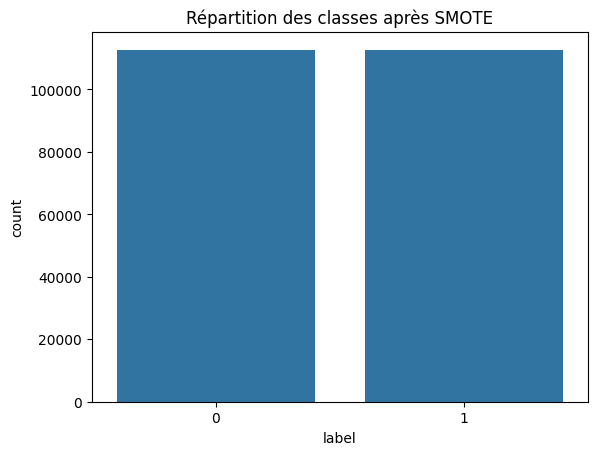

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Répartition des classes après SMOTE
sns.countplot(x=y_train_res)
plt.title("Répartition des classes après SMOTE")
plt.show()

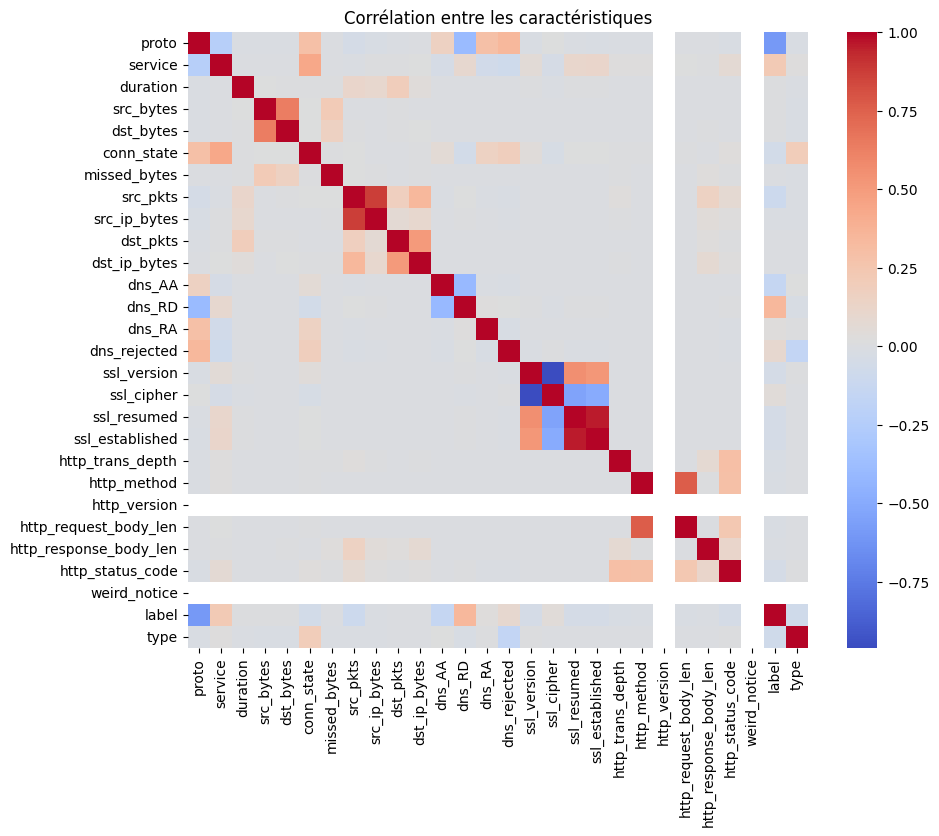

In [ ]:
# Corrélation entre features
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Corrélation entre les caractéristiques")
plt.show()


Précision du modèle : 99.78%

Rapport de classification :

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     15000
           1       1.00      1.00      1.00     48313

    accuracy                           1.00     63313
   macro avg       1.00      1.00      1.00     63313
weighted avg       1.00      1.00      1.00     63313



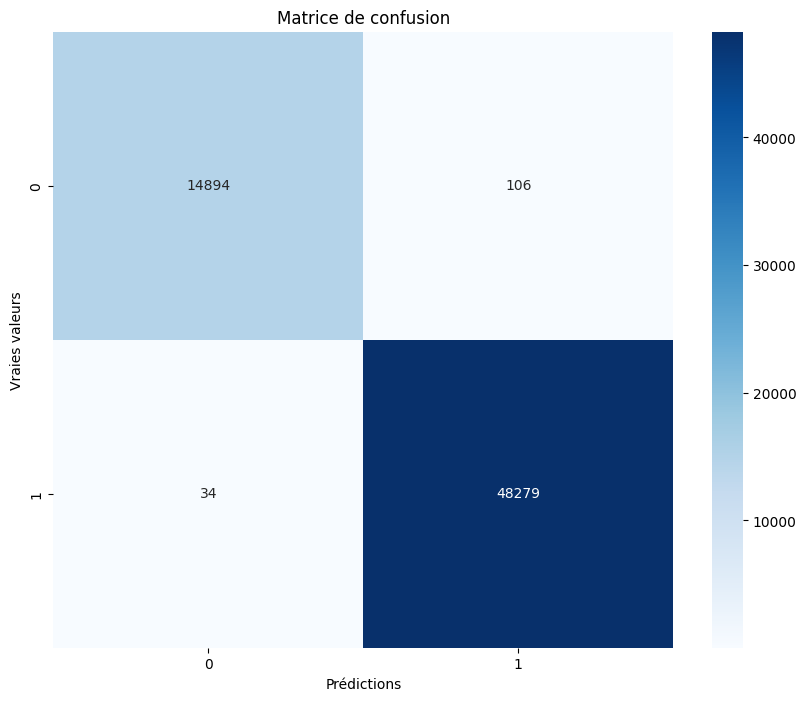

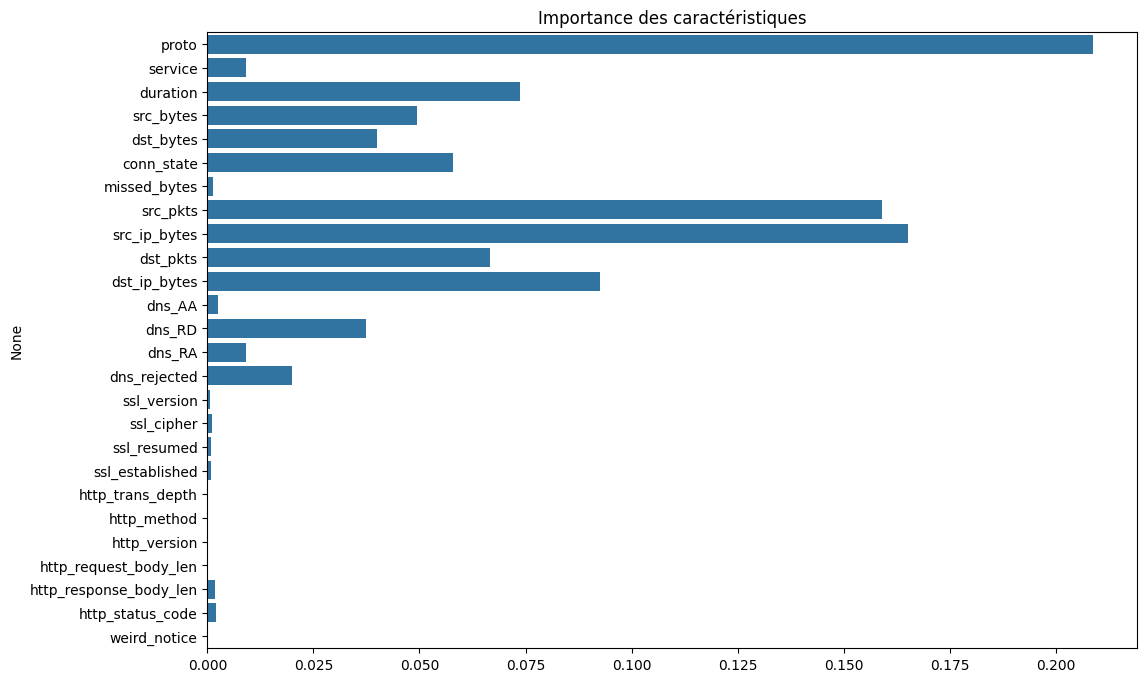

In [ ]:
# Import des bibliothèques nécessaires pour le modèle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Création du modèle Random Forest (facile et puissant)
model = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 arbres, seed pour reproductibilité

# Entraînement du modèle
model.fit(X_train, y_train)

# Prédictions sur les données de test
y_pred = model.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle : {accuracy * 100:.2f}%")

# Rapport de classification détaillé
print("\nRapport de classification :\n")
print(classification_report(y_test, y_pred))

# Matrice de confusion pour visualiser les erreurs
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion")
plt.xlabel("Prédictions")
plt.ylabel("Vraies valeurs")
plt.show()

# Importance des features (pour voir quelles colonnes sont les plus utiles)
importances = model.feature_importances_
features = X_train.columns
plt.figure(figsize=(12, 8))
sns.barplot(x=importances, y=features)
plt.title("Importance des caractéristiques")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Création du modèle Random Forest (facile et puissant)
model = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 arbres, seed pour reproductibilité

# Entraînement du modèle
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Prédictions sur les données de test
y_pred = model.predict(X_test)

In [ ]:
# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle : {accuracy * 100:.2f}%")

Précision du modèle : 99.78%


In [ ]:
# Rapport de classification détaillé
print("\nRapport de classification :\n")
print(classification_report(y_test, y_pred))


Rapport de classification :

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     15000
           1       1.00      1.00      1.00     48313

    accuracy                           1.00     63313
   macro avg       1.00      1.00      1.00     63313
weighted avg       1.00      1.00      1.00     63313



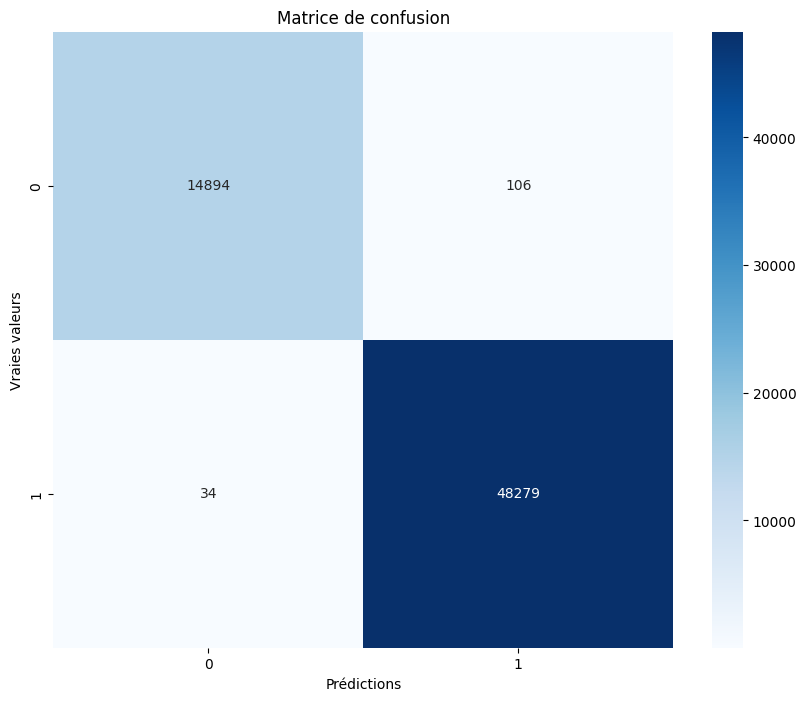

In [ ]:
# Matrice de confusion pour visualiser les erreurs
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion")
plt.xlabel("Prédictions")
plt.ylabel("Vraies valeurs")
plt.show()

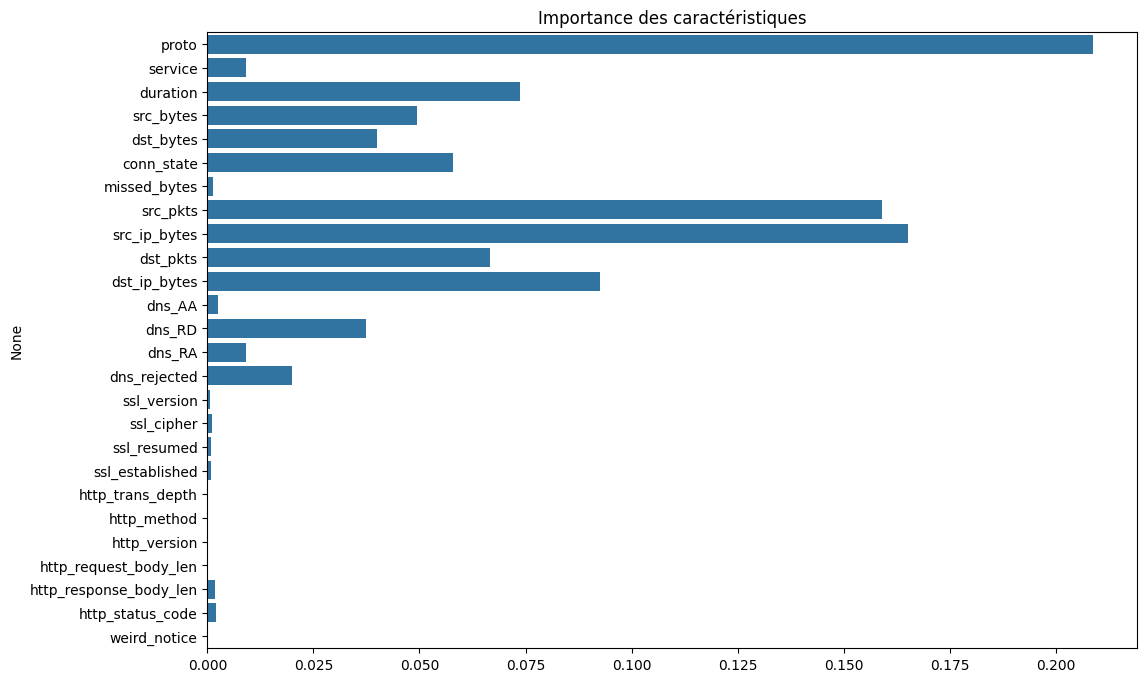

In [ ]:
# Importance des features (pour voir quelles colonnes sont les plus utiles)
importances = model.feature_importances_
features = X_train.columns
plt.figure(figsize=(12, 8))
sns.barplot(x=importances, y=features)
plt.title("Importance des caractéristiques")
plt.show()